<a href="https://colab.research.google.com/github/francinamudzingwa26/fran/blob/master/ASSIGNMENT2_R189405W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
 
sns.set(rc={"figure.figsize": (22 , 22)})
sns.set(style="white")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
data['TotalCharges']=data['TotalCharges'].fillna(value= np.mean(data['TotalCharges']))

In [ ]:
from numpy import array
values = array(data['Churn'])
integer_encoded = label_encoder.fit_transform(values)
onehot_encoded = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
onehot_encoded = onehot_encoded.fit_transform(integer_encoded)

In [ ]:
data_new= data.drop('customerID', axis =1)
data_test= pd.get_dummies(data_new)
data_test['Churn']=label_encoder.fit_transform(values)


In [ ]:
data_new['Churn']=label_encoder.fit_transform(values)
data_new['Churn']


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

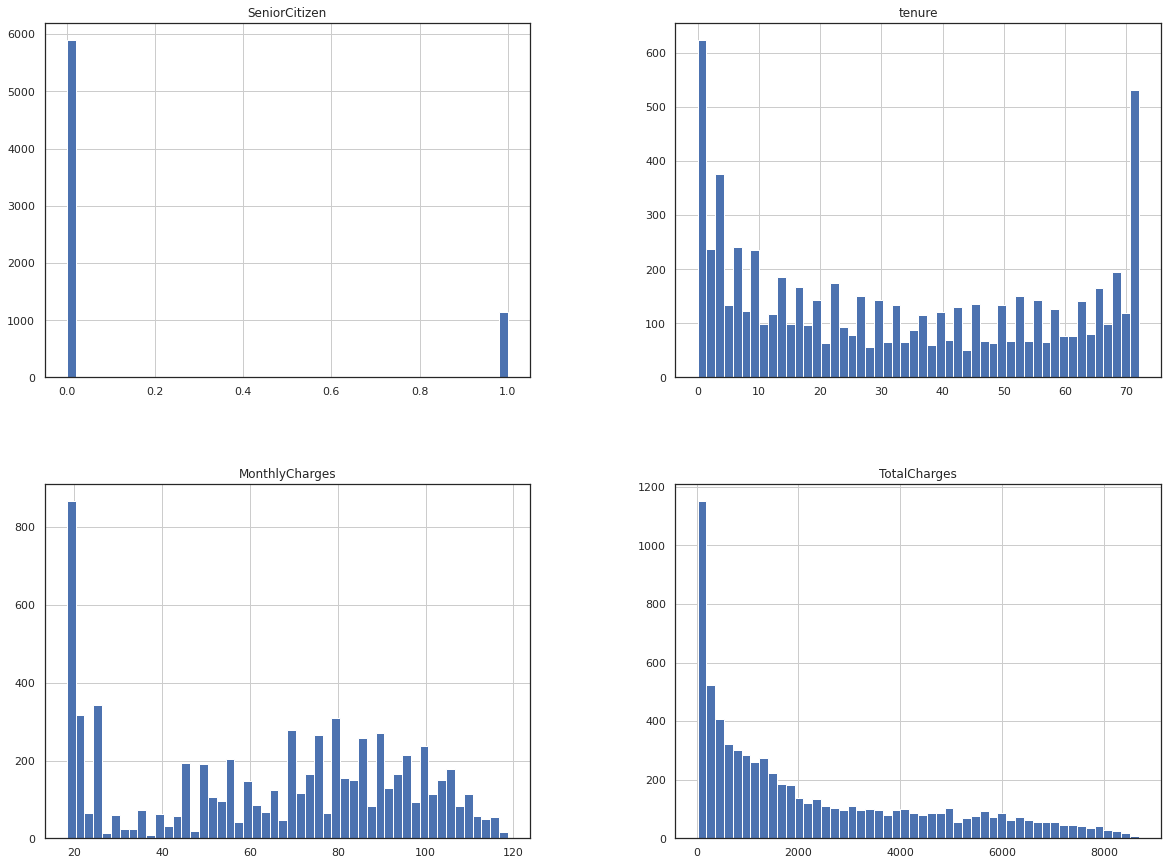

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

BEGINNING OF QUESTION ONE

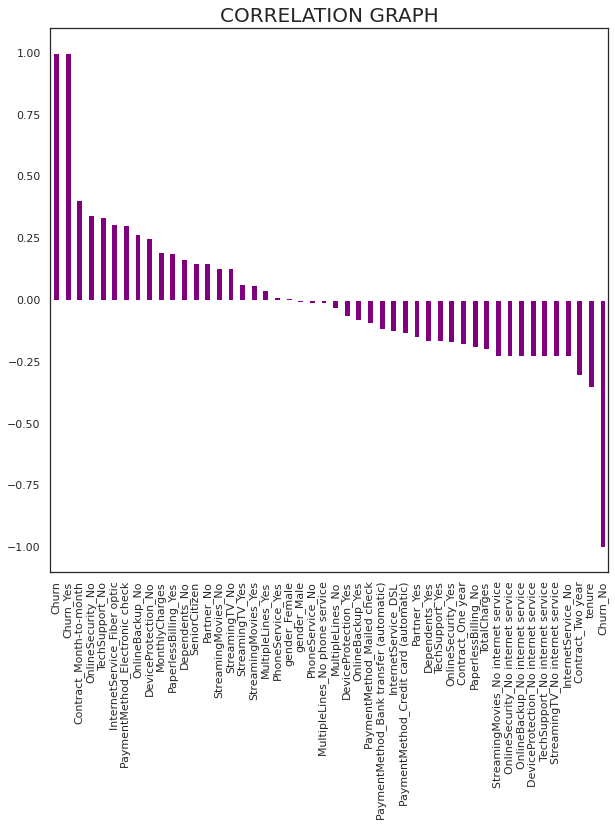

In [ ]:
plt.figure(figsize=(10,10))
plt.title('correlation_graph', fontsize=20)
questionAns=data_test.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color='purple')
print(" ")
print(" ")
print(" ")
print(" ")
questionAns

In [ ]:
corr_matrix = data_test.corr()
#corr_matrix

In [ ]:

corr_matrix['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Churn_Yes                                  1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1720205d90>,
      dtype=object)

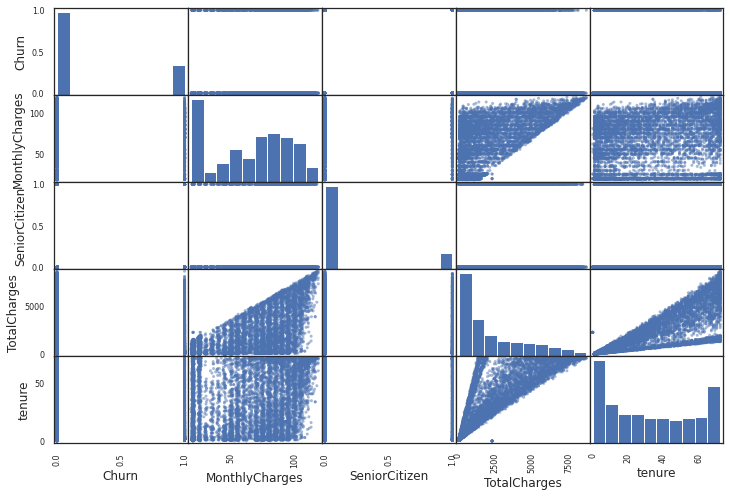

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Churn", "MonthlyCharges", "SeniorCitizen","TotalCharges","tenure"]
scatter_matrix(data_test[attributes], figsize=(12, 8))


In [ ]:

y = data_test['Churn'].values
X = data_test.drop(columns = ['Churn'])


from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)

print (metrics.accuracy_score(y_test, prediction_test))


1.0


AxesSubplot(0.125,0.125;0.775x0.755)


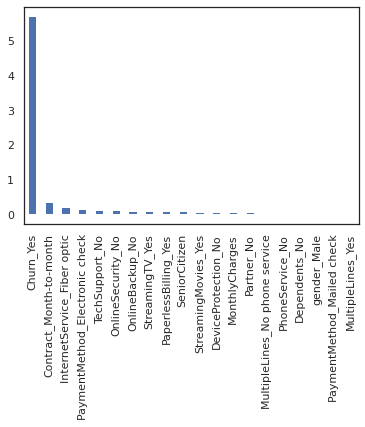

In [ ]:
weights = pd.Series(model.coef_[0],index=X.columns.values)
print (weights.sort_values(ascending = False)[:20].plot(kind='bar'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Making predictions
prediction_test = model_rf.predict(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)

# Creating the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  


[[1023    0]
 [   0  386]]


BEGINNING OF QUESTION 3

In [ ]:
#Extreme Gradient Boosting “XGBOOST” model

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
#EVALUATING MODEL'S ACCURACY AND CALCULATING AUC VALUE
metrics.accuracy_score(y_test, preds)

1.0

BEGINNING OF QUESTION 4

In [ ]:
import pickle
with open('customer_chun.pkl', 'wb') as file:
  pickle.dump(preds, file)


In [ ]:
import flask
import pickle
# Use pickle to load in the pre-trained model.
with open(f'customer_chun.pkl', 'rb') as f:
    model = pickle.load(f)
app = flask.Flask(__name__, template_folder='templates')
@app.route('/', methods=['GET', 'POST'])
def main():
  #["Churn", "MonthlyCharges", "SeniorCitizen","TotalCharges","tenure"]
    if flask.request.method == 'GET':
        return(flask.render_template('main.html'))
    if flask.request.method == 'POST':
        MonthlyCharges = flask.request.form['MonthlyCharges']
        SeniorCitizen = flask.request.form['SeniorCitizen']
        TotalCharges = flask.request.form['TotalCharges']
        tenure = flask.request.form['tenure']
        input_variables = pd.DataFrame([[MonthlyCharges , SeniorCitizen , TotalCharges , tenure ]],
                                       columns=["MonthlyCharges", "SeniorCitizen","TotalCharges","tenure"],
                                       dtype=float)
        prediction = model.predict(input_variables)[0]
        return flask.render_template('main.html',
                                     original_input={'MonthlyCharges':MonthlyCharges,
                                                     'SeniorCitizen':SenoirCitizen,
                                                     'TotalCharges':TotalCharges,
                                                     'tenure': tenure},
                                     result=prediction,
                                     )
if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
from flask import Flask, request, jsonify, render_template